In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função U(x, y)
def U(x, y):
    return np.sin(x) * np.sin(y) + (x * y)**2 / 500

# Gradiente de U
def grad_U(x, y):
    dU_dx = np.cos(x) * np.sin(y) + (x * y**2) / 250
    dU_dy = np.sin(x) * np.cos(y) + (y * x**2) / 250
    return np.array([dU_dx, dU_dy])


In [ ]:
# Parâmetros do gradiente descendente
taxa = 0.1           # taxa de aprendizado
tol = 1e-5            # tolerância para ||gradiente||
max_pasos = 1000      # número máximo de passos
pos = np.array([-1.0, 1.0])  # ponto inicial

# Lista para registrar trajetória
trajectory = [pos.copy()]

# Loop do gradiente descendente com critério de tolerância
for _ in range(max_pasos):
    grad = grad_U(*pos)
    if np.linalg.norm(grad) < tol:
        break
    pos = pos - taxa * grad
    trajectory.append(pos.copy())

trajectory = np.array(trajectory)
print(f'Convergiu para mínimo em: {pos}, valor U = {U(*pos):.5f}, passos = {len(trajectory)}')
  

Convergiu para mínimo em: [-1.5557261  1.5557261], valor U = -0.98806, passos = 107


In [7]:
# Plotando o gráfico com imshow e trajetória
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = U(X, Y)


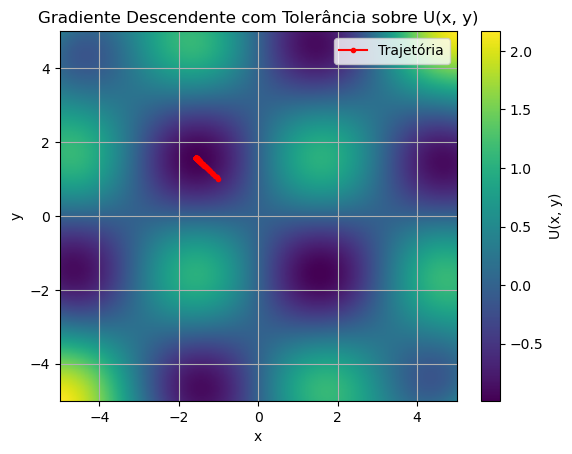

In [9]:

#plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='U(x, y)')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Trajetória')
plt.title('Gradiente Descendente com Tolerância sobre U(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('min_glo.png', dpi=300)
plt.show()